In [1]:
import pandas as pd
import numpy as np
data_path="../../"
pd.set_option("display.max_colwidth", 0)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [2]:
df=pd.read_csv(data_path+"data/zillow_data.csv")
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [4]:
good_df=melt_data(df)
good_df

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago,Cook,84654,1,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,91982,3,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,84616,4,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,93144,5,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,Ashfield,MA,Greenfield Town,Franklin,58333,14719,2018-04-01,209300.0
3901591,3293,Woodstock,NH,Claremont,Grafton,59107,14720,2018-04-01,225800.0
3901592,40404,Berea,KY,Richmond,Madison,75672,14721,2018-04-01,133400.0
3901593,81225,Mount Crested Butte,CO,NaN,Gunnison,93733,14722,2018-04-01,664400.0


In [5]:
chicago_df=df[df['Metro'] == 'Chicago']
chicago_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,84545,60511,Big Rock,IL,Chicago,Kane,14258,167200.0,166600.0,165900.0,...,234000,231400,230000,230400,231900,233600,235200,236500,237300,237600
14275,84400,60150,Malta,IL,Chicago,DeKalb,14276,133000.0,132800.0,132500.0,...,125800,126700,128100,129800,131600,133000,134200,135700,138700,141500
14316,84426,60180,Union,IL,Chicago,McHenry,14317,162900.0,162400.0,161900.0,...,209100,217300,222500,222200,223200,226400,229300,231500,234500,236800
14499,78853,47948,Goodland,IN,Chicago,Newton,14500,NaN,NaN,NaN,...,91100,90100,90000,89100,85600,82200,80300,79600,81300,83200


In [6]:
chicago_df['ROI_5yrs']=((chicago_df['2018-04'] -chicago_df['2013-04'])/chicago_df['2013-04'])*100

In [7]:
chicago_df.sort_values('ROI_5yrs', ascending=False)[:30]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_5yrs
948,84693,60804,Cicero,IL,Chicago,Cook,949,96500.0,97000.0,97300.0,...,155800,156800,157900,159200,160500,161800,162900,163800,164400,102.712700
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,...,107100,107300,106800,107200,107600,108600,110800,113400,114500,83.493590
5896,84403,60153,Maywood,IL,Chicago,Cook,5897,88600.0,88400.0,88000.0,...,128200,130400,133500,136700,139200,142000,144100,144800,145500,80.745342
3337,84364,60110,Carpentersville,IL,Chicago,Kane,3338,112100.0,113100.0,113600.0,...,153200,154300,155200,156500,158100,159200,160100,161800,163200,79.537954
6727,84358,60104,Bellwood,IL,Chicago,Cook,6728,97900.0,98300.0,98600.0,...,139300,141000,142900,144200,145300,146700,148300,149800,150700,76.670574
1392,84541,60505,Aurora,IL,Chicago,Kane,1393,79300.0,80000.0,80200.0,...,118700,119500,120800,122900,125500,127600,129200,131100,132100,76.368491
1496,84648,60651,Chicago,IL,Chicago,Cook,1497,74700.0,75100.0,75400.0,...,136100,137300,139600,141800,142900,145200,148300,150300,150900,76.079347
725,84329,60073,Round Lake Beach,IL,Chicago,Lake,726,125200.0,126100.0,126600.0,...,139700,140400,141200,142300,143400,144600,146300,147700,148100,71.809745
6496,84487,60436,Joliet,IL,Chicago,Will,6497,78200.0,78300.0,78400.0,...,103600,105000,107000,109200,111200,112700,114100,116100,117700,66.478076
658,84639,60639,Chicago,IL,Chicago,Cook,659,111200.0,111900.0,112300.0,...,223100,222900,223300,224600,226100,228700,231400,232700,232600,65.787598


In [8]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City',
                                  'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank'],
                     var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

62448-misssing value from chicago df


In [11]:
good_df=melt_data(df)
good_df

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago,Cook,84654,1,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,91982,3,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,84616,4,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,93144,5,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,Ashfield,MA,Greenfield Town,Franklin,58333,14719,2018-04-01,209300.0
3901591,3293,Woodstock,NH,Claremont,Grafton,59107,14720,2018-04-01,225800.0
3901592,40404,Berea,KY,Richmond,Madison,75672,14721,2018-04-01,133400.0
3901593,81225,Mount Crested Butte,CO,NaN,Gunnison,93733,14722,2018-04-01,664400.0


In [12]:
df.dtypes

RegionID      int64 
RegionName    int64 
City          object
State         object
Metro         object
               ...  
2017-12       int64 
2018-01       int64 
2018-02       int64 
2018-03       int64 
2018-04       int64 
Length: 272, dtype: object

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,...,106500,107100,107300,106800,107200,107600,108600,110800,113400,114500
1392,84541,60505,Aurora,IL,Chicago,Kane,1393,79300.0,80000.0,80200.0,...,118400,118700,119500,120800,122900,125500,127600,129200,131100,132100
3654,84354,60099,Zion,IL,Chicago,Lake,3655,108700.0,109200.0,109400.0,...,116400,118200,120000,121100,122100,122700,123100,124700,127000,127900
6496,84487,60436,Joliet,IL,Chicago,Will,6497,78200.0,78300.0,78400.0,...,102500,103600,105000,107000,109200,111200,112700,114100,116100,117700
7863,84634,60633,Chicago,IL,Chicago,Cook,7864,77900.0,78200.0,78300.0,...,103300,104700,105400,106800,109000,110400,111500,112800,113300,113000
9411,84411,60162,Hillside,IL,Chicago,Cook,9412,120300.0,120000.0,119700.0,...,168300,168500,168700,169000,169300,170200,171700,172800,173500,173800
11235,84412,60163,Berkeley,IL,Chicago,Cook,11236,121100.0,120800.0,120500.0,...,166800,167700,168700,170200,172300,174200,175600,177300,179200,180100
12716,84414,60165,Stone Park,IL,Chicago,Cook,12717,107100.0,106800.0,106500.0,...,147500,148400,149200,149900,150700,152300,154300,155500,155800,156000
13647,84298,60034,Hebron,IL,Chicago,McHenry,13648,112900.0,112800.0,112800.0,...,156700,163900,167700,168700,170300,172900,175800,177100,177500,178000
14316,84426,60180,Union,IL,Chicago,McHenry,14317,162900.0,162400.0,161900.0,...,209100,217300,222500,222200,223200,226400,229300,231500,234500,236800


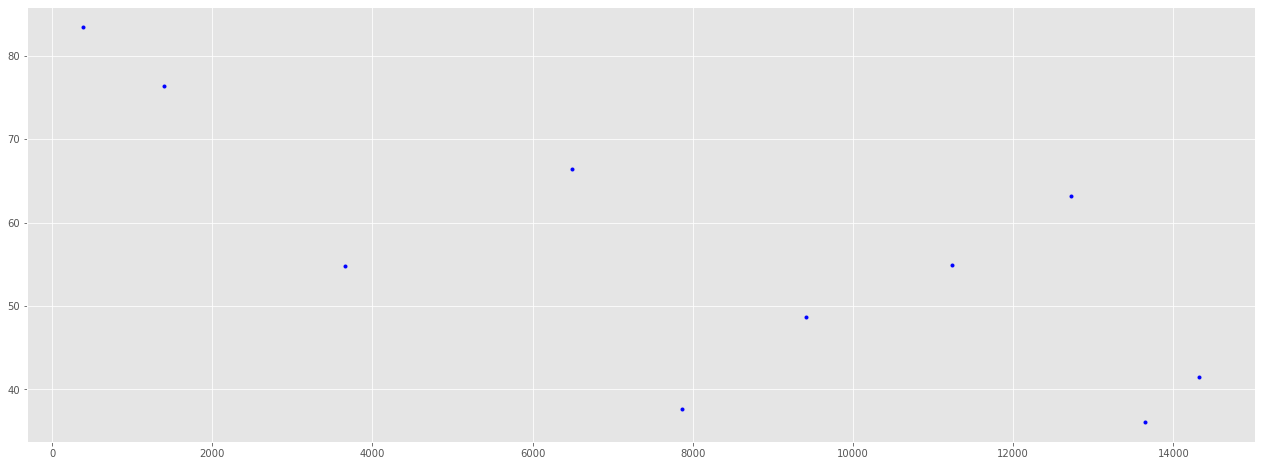

In [14]:
my_regions.ROI_5yrs.plot(figsize = (22,8), style = 'b.')
plt.show()

In [ ]:
my_regions.set_index('time', inplace=True)


In [ ]:
my_regions

In [ ]:
my_regions['value'].plot(figsize = (14,5));

In [ ]:
ts_dr = pd.date_range(my_regions.index["2013-04-01"], my_regions.index("2018-04-01"))


In [11]:
# import os, sys
# module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
# if module_path not in sys.path:
#     sys.path.append(module_path)